# SI Model （suitable for incurable infective disease)

In [2]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Population
N = 1e7
# Simulation time / Day
T = 150
# Contact rate
lamda = 0.5
# Recovery rate
gamma = 0
# Infective ratio 
i = np.zeros([T])
# Initial infective ratio 
i[0] = 45.0 / N
# Susceptible ratio 
s = np.zeros([T])
# Initial susceptible ratio
s[0] = 1 - i[0]
# Initial susceptible and infective ratio
INI = (s[0],i[0])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

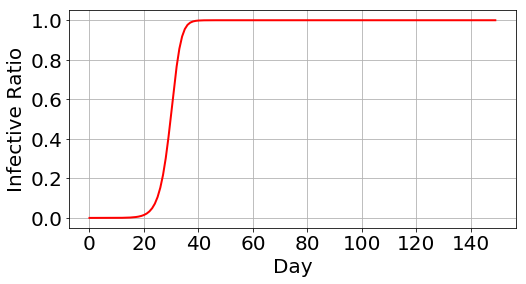

In [4]:
# Rate 
for t in range(T-1):
    i[t + 1] = i[t] + i[t] * lamda * (1.0 - i[t])

# Infective rate plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(i, c='r', lw=2)
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Infective Ratio', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

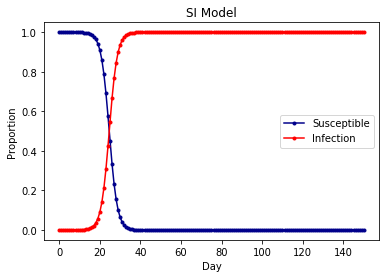

In [4]:
# Susceptible and infective population proportion
def funcSI(prop,_):
    Y = np.zeros(2) # Y[0] = s[t+1] - s[t], Y[1] = i[t+1] - i[t]
    X = prop # X[0] = s[t], X[1] = i[t]
    # Susceptible proportion change
    Y[0] = - lamda * X[0] * X[1] + gamma * X[1]
    # Infective proportion change
    Y[1] = lamda * X[0] * X[1] - gamma * X[1]
    return Y

T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSI,INI,T_range)

# susceptible and infective proportion plot
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.title('SI Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Proportion')
plt.show()

# SIS Model 
### (recovered individual still susceptible)

In [5]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Population
N = 1e7
# Simulation time / Day
T = 150
# Contact rate
lamda = 0.2586
# Recovery rate
gamma = 0.0235
# Infective ratio 
i = np.zeros([T])
# Initial infective ratio 
i[0] = 45.0 / N
# Susceptible ratio 
s = np.zeros([T])
# Initial susceptible ratio
s[0] = 1 - i[0]
# Initial susceptible and infective ratio
INI = (s[0],i[0])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

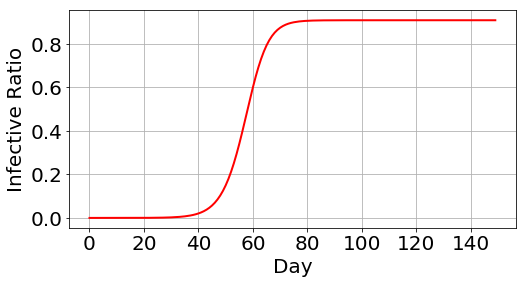

In [7]:
# Infective rate 
for t in range(T-1):
    i[t + 1] = i[t] + i[t] * lamda * (1.0 - i[t]) - gamma*i[t]

# Infective rate plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(i, c='r', lw=2)
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Infective Ratio', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

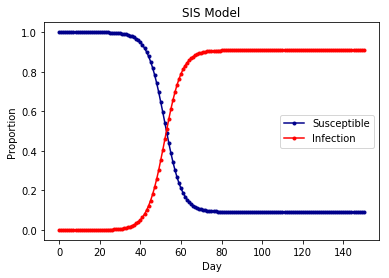

In [8]:
# Susceptible and infective population proportion
def funcSIS(prop,_):
    Y = np.zeros(2) # Y[0] = s[t+1] - s[t], Y[1] = i[t+1] - i[t]
    X = prop # X[0] = s[t], X[1] = i[t]
    # Susceptible proportion change
    Y[0] = - lamda * X[0] * X[1] + gamma * X[1]
    # Infective proportion change
    Y[1] = lamda * X[0] * X[1] - gamma * X[1]
    return Y

T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSIS,INI,T_range)

# susceptible and infective proportion plot
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.title('SIS Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Proportion')
plt.show()

# SIR Model 
### (recovered individual with lifelong immunity)

In [9]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Population
N = 1e7
# Simulation time / Day
T = 150
# Contact rate
lamda = 0.2586
# Recovery rate
gamma = 0.0235
# Infective ratio 
i = np.zeros([T])
# Initial infective ratio 
i[0] = 45.0 / N
# Remove ratio
r = np.zeros([T])
# Initial remove ratio
#r[0] = gamma * i[0]
r[0] = 0
# Susceptible ratio 
s = np.zeros([T])
# Initial susceptible ratio
s[0] = 1 - i[0] - r[0]
# Initial susceptible，infective and remove ratio
INI = (s[0],i[0],r[0])

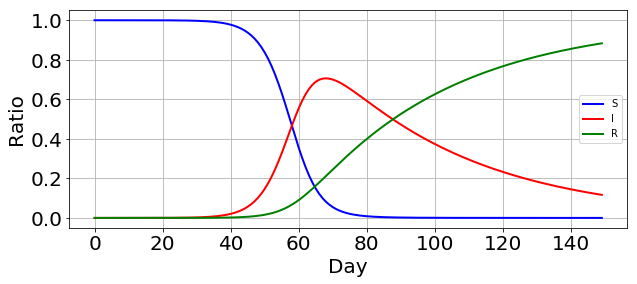

In [11]:
# Infective rate 
for t in range(T-1):
    i[t + 1] = i[t] + i[t] * lamda * s[t] - gamma*i[t]
    s[t + 1] = s[t] - i[t] * lamda * s[t]
    r[t + 1] = r[t] + gamma*i[t]

# Infective rate plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(s, c='b', lw=2, label='S')
ax.plot(i, c='r', lw=2, label='I')
ax.plot(r, c='g', lw=2, label='R')
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Ratio', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()

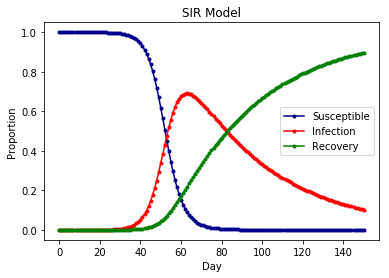

In [12]:
# Susceptible, infective, recovery population proportion
def funcSIR(prop,_):
    Y = np.zeros(3) # Y[0] = s[t+1] - s[t], Y[1] = i[t+1] - i[t]
    X = prop # X[0] = s[t], X[1] = i[t]
    # Susceptible proportion change
    Y[0] = - lamda * X[0] * X[1]
    # Infective proportion change
    Y[1] = lamda * X[0] * X[1] - gamma * X[1]
    # Remove proportion change
    Y[2] = gamma * X[1]
    return Y

T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSIR,INI,T_range)

# susceptible and infective proportion plot
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,2],color = 'green', label = 'Recovery',marker = '.')
plt.title('SIR Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Proportion')
plt.show()

# SIRS Model 
### （recovered individual with waning immunity)

In [13]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Population
N = 1e7
# Simulation time / Day
T = 150
# Contact rate
lamda = 0.2586
# Recovery rate
gamma = 0.0235
# Immunity waning rate
alpha = 0.6
# Infective ratio 
i = np.zeros([T])
# Initial infective ratio 
i[0] = 45.0 / N
# Remove ratio
r = np.zeros([T])
# Initial remove ratio
#r[0] = gamma * i[0]
r[0] = 0
# Susceptible ratio 
s = np.zeros([T])
# Initial susceptible ratio
s[0] = 1 - i[0] - r[0]
# Initial susceptible，infective and remove ratio
INI = (s[0],i[0],r[0])

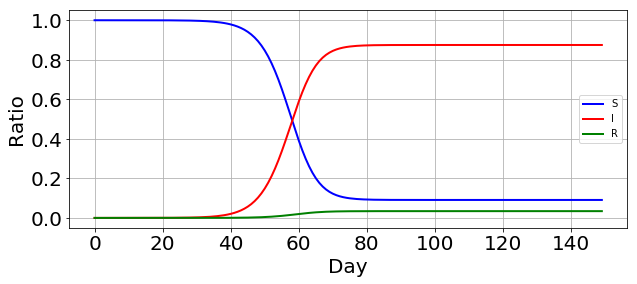

In [15]:
# Infective rate 
for t in range(T-1):
    i[t + 1] = i[t] + i[t] * lamda * s[t] - gamma*i[t]
    s[t + 1] = s[t] - i[t] * lamda * s[t] + alpha * r[t]
    r[t + 1] = r[t] + gamma*i[t] - alpha * r[t]

# Infective rate plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(s, c='b', lw=2, label='S')
ax.plot(i, c='r', lw=2, label='I')
ax.plot(r, c='g', lw=2, label='R')
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Ratio', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()

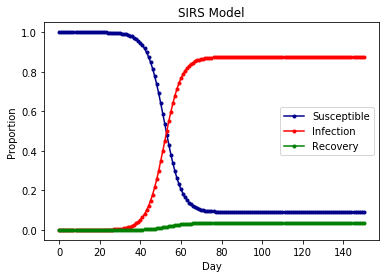

In [16]:
# Susceptible and infective population proportion
def funcSIRS(prop,_):
    Y = np.zeros(3) # Y[0] = s[t+1] - s[t], Y[1] = i[t+1] - i[t]
    X = prop # X[0] = s[t], X[1] = i[t]
    # Susceptible proportion change
    Y[0] = - lamda * X[0] * X[1] + alpha * X[2]
    # Infective proportion change
    Y[1] = lamda * X[0] * X[1] - gamma * X[1]
    # Remove proportion change
    Y[2] = gamma * X[1] - alpha * X[2]
    return Y

T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSIRS,INI,T_range)

# susceptible and infective proportion plot
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,2],color = 'green', label = 'Recovery',marker = '.')
plt.title('SIRS Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Proportion')
plt.show()

# SEIR Model

In [17]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Population
N = 1e7
# Simulation time / Day
T = 150
# Contact rate
lamda = 0.2586
# Exposed to infective rate
sigma = 1/4
# Recovery rate
gamma = 0.0235
# Immunity waning rate
# alpha = 0.6

# Infective ratio 
i = np.zeros([T])
# Initial infective ratio 
i[0] = 5.0 / N
# Exposed ratio
e = np.zeros([T])
# Initial exposed ratio
e[0] = 40.0 / N
# Remove ratio
r = np.zeros([T])
# Initial remove ratio
#r[0] = gamma * i[0]
r[0] = 0
# Susceptible ratio 
s = np.zeros([T])
# Initial susceptible ratio
s[0] = 1 - e[0] - i[0] - r[0]
# Initial susceptible，infective and remove ratio
INI = (s[0],i[0],e[0],r[0])

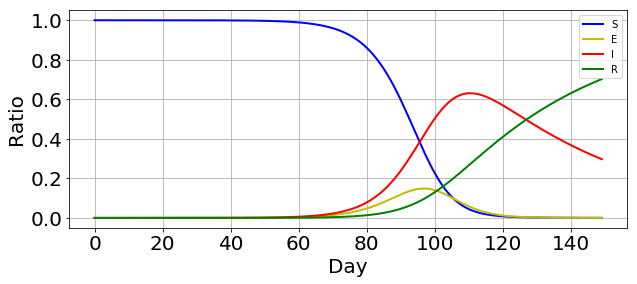

In [19]:
# Infective rate 
for t in range(T-1):
    s[t + 1] = s[t] - i[t] * lamda * s[t] 
    e[t + 1] = e[t] + lamda * s[t] * i[t] - sigma * e[t]
    i[t + 1] = i[t] + sigma * e[t] - gamma * i[t]
    r[t + 1] = r[t] + gamma * i[t]

# Infective rate plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(s, c='b', lw=2, label='S')
ax.plot(e, c='y', lw=2, label='E')
ax.plot(i, c='r', lw=2, label='I')
ax.plot(r, c='g', lw=2, label='R')
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Ratio', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()

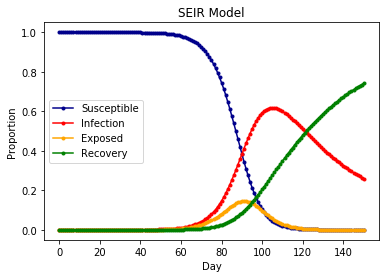

In [21]:
# Susceptible and infective population proportion
def funcSEIR(prop,_):
    Y = np.zeros(4) # Y[0] = s[t+1] - s[t], Y[1] = e[t+1] - e[t], Y[2] = i[t+1] - i[t], Y[3] = r[t+1]-r[t]
    X = prop # X[0] = s[t], X[1] = i[t], X[2] = e[t], X[3]=r[t]
    # Susceptible proportion change
    Y[0] = - lamda * X[0] * X[1] 
    # Infective proportion change
    Y[1] = sigma * X[2] - gamma * X[1]
    # Exposed proportion change
    Y[2] = lamda * X[0] * X[1] - sigma * X[2]
    # Remove proportion change
    Y[3] = gamma * X[1] 
    return Y

T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSEIR,INI,T_range)

# susceptible and infective proportion plot
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,2],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(RES[:,3],color = 'green',label = 'Recovery',marker = '.')
plt.title('SEIR Model')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Proportion')
plt.show()

# SEIR Model (Motality)

In [ ]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Population
N = 1e7
# Simulation time / Day
T = 150
# Contact rate
lamda = 0.2586
# Exposed to infective rate
sigma = 1/4
# Motality
die = 0.02691
# Recovery rate
gamma = 0.0235
# Immunity waning rate
# alpha = 0.6

# Infective rate
i = np.zeros([T])
# Initial infective proportion
i[0] = 5.0 / N
# Exposed rate
e = np.zeros([T])
# Initial exposed proportion
e[0] = 40.0 / N
# Remove rate
r = np.zeros([T])
# Initial remove proportion
#r[0] = gamma * i[0]
r[0] = 0
# Susceptible proportion
s = np.zeros([T])
# Initial susceptible proportion
s[0] = 1 - e[0] - i[0] - r[0]
# Motality
d = np.zeros([T])
# Initial motality
d[0] = 0
# Initial susceptible，infective and remove ratio
INI = (s[0],i[0],e[0],r[0],d[0])

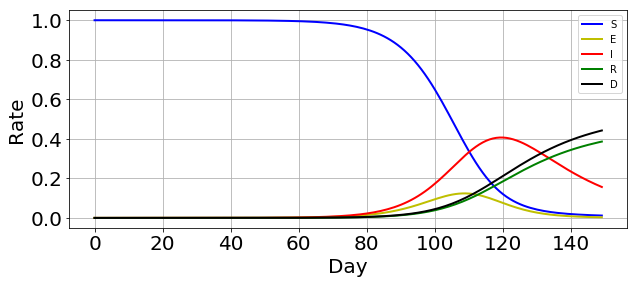

In [30]:
# Rate 
for t in range(T-1):
    s[t + 1] = s[t] - i[t] * lamda * s[t] 
    e[t + 1] = e[t] + lamda * s[t] * i[t] - sigma * e[t]
    i[t + 1] = i[t] + sigma * e[t] - gamma * i[t] - die * i[t]
    r[t + 1] = r[t] + gamma * i[t]
    d[t + 1] = d[t] + die * i[t]

#  Plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(s, c='b', lw=2, label='S')
ax.plot(e, c='y', lw=2, label='E')
ax.plot(i, c='r', lw=2, label='I')
ax.plot(r, c='g', lw=2, label='R')
ax.plot(d, c='black', lw=2, label='D')
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Rate', fontsize=20)
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()

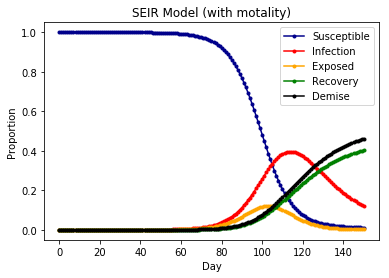

In [32]:
# Susceptible and infective population proportion
def funcSEIRD(prop,_):
    Y = np.zeros(5) # Y[0] = s[t+1] - s[t], Y[1] = e[t+1] - e[t], Y[2] = i[t+1] - i[t], Y[3] = r[t+1]-r[t], Y[4]=d[t+1]-d[t]
    X = prop # X[0] = s[t], X[1] = i[t], X[2] = e[t], X[3]=r[t], X[4]=d[t]
    # Susceptible proportion change
    Y[0] = - lamda * X[0] * X[1] 
    # Infective proportion change
    Y[1] = sigma * X[2] - gamma * X[1] - die * X[1]
    # Exposed proportion change
    Y[2] = lamda * X[0] * X[1] - sigma * X[2]
    # Remove proportion change
    Y[3] = gamma * X[1] 
    # Motality change
    Y[4] = die * X[1]
    return Y

T_range = np.arange(0,T + 1)
RES = spi.odeint(funcSEIRD,INI,T_range)

# susceptible and infective proportion plot
plt.plot(RES[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES[:,1],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES[:,2],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(RES[:,3],color = 'green',label = 'Recovery',marker = '.')
plt.plot(RES[:,4],color = 'black',label = 'Demise',marker = '.')
plt.title('SEIR Model (with motality)')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Proportion')
plt.show()

# SEIRDS

# Ro